
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,42.70,49.02,18.52,17.00,18.30,16.10,10.59,18.22,18.52,1.02
1,DIA,DJIA ETF,US Stocks:Large Cap,18.69,37.58,9.69,12.02,17.03,13.94,9.58,18.40,9.69,0.53
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,97.38,78.03,44.24,30.40,29.23,20.13,11.69,20.01,44.24,2.21
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,59.62,68.84,22.99,18.03,19.29,15.86,10.11,19.15,22.99,1.20
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,191.30,224.64,37.83,17.51,20.45,21.19,9.26,25.69,37.83,1.47
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,63.95,116.28,23.16,13.49,16.58,18.91,11.25,23.37,23.16,0.99
6,IWD,Russell 1000 Value ETF,US Stocks:Value,27.17,61.16,6.81,9.42,12.74,16.06,10.66,19.48,6.81,0.35
7,IWF,Russell 1000 Growth ETF,US Stocks,71.73,58.59,34.79,25.52,24.64,18.29,10.90,19.28,34.79,1.80
8,RSP,S&P 500 Equal Weight ETF,US Stocks,34.62,65.90,16.05,13.60,16.18,15.10,9.77,21.17,16.05,0.76
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,153.22,216.97,29.57,14.54,18.33,20.55,9.88,26.03,29.57,1.14


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
16,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,83.03,64.52,37.14,31.79,30.52,19.44,10.39,20.91,37.14,1.78
21,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,41.98,58.59,31.87,20.90,21.57,21.15,12.95,21.45,31.87,1.49
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,-38.12,27.45,24.41,10.86,15.22,19.30,12.69,20.69,24.41,1.18
20,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,-16.42,22.27,13.42,14.91,14.64,13.79,10.74,15.87,13.42,0.85
17,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,-7.84,9.51,5.36,10.17,8.65,12.27,8.83,13.57,5.36,0.39
15,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,3.54,32.33,8.56,9.30,14.76,17.37,10.57,23.27,8.56,0.37
14,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,11.39,84.23,3.19,7.12,15.86,21.48,12.80,23.51,3.19,0.14
18,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,202.70,28.66,-2.71,13.13,10.89,14.42,5.89,15.73,-2.71,-42.63
19,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,38.27,-7.98,-4.90,13.82,9.98,16.61,9.82,13.22,-4.90,-64.78
13,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,107.58,252.77,-12.19,-7.71,0.45,36.18,20.01,39.30,-12.19,-479.07


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLK,XLY,XLB,XLV,XLP,XLI,XLF,XLRE,XLU,XLE,All S&P500 Sectors Portfolio
Annual Returns,37.14,31.87,24.41,13.42,5.36,8.56,3.19,-2.71,-4.90,-12.19,10.42
Std Dev,20.91,21.45,20.69,15.87,13.57,23.27,23.51,15.73,13.22,39.30,18.87
Sharpe Ratio,1.78,1.49,1.18,0.85,0.39,0.37,0.14,-42.63,-64.78,-479.07,0.55
Weight,0.10,0.08,0.08,0.10,0.12,0.10,0.08,0.18,0.11,0.05,1.00
Worst Typical Down Year,-4.68,-11.03,-16.97,-18.32,-21.78,-37.98,-43.83,-34.17,-31.34,-90.79,-27.32
Black Swan,-25.59,-32.48,-37.66,-34.19,-35.35,-61.25,-67.34,-49.90,-44.56,-130.09,-46.18


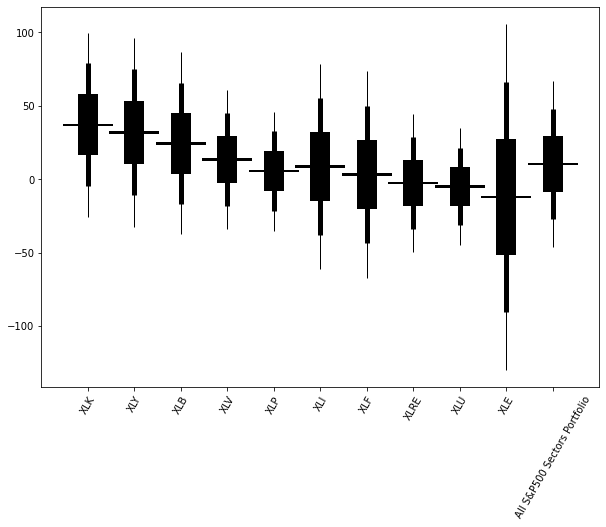

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

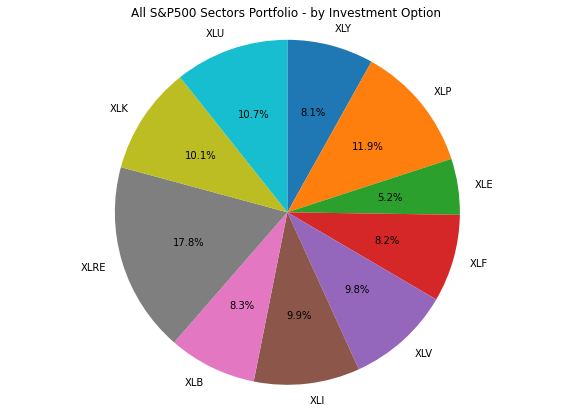

XLY    0.08
XLP    0.05
XLE    0.08
XLF    0.10
XLV    0.10
XLI    0.12
XLB    0.18
XLRE   0.11
XLK    0.10
XLU    0.08



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLK                            0.1010
    XLY                            0.0810
    XLB                            0.0827
    XLV                            0.0977
    XLP                            0.1188
    XLI                            0.0993
    XLF                            0.0820
    XLRE                           0.1782
    XLU                            0.1069
    XLE                            0.0524


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.........

All S&P500 Sectors Portfolio Metrics:         
    max_sharpe_ratio                      1.34
    annual_return                        23.92
    std_dev                              17.85
    worst typical down year             -11.78
    black_swan                          -29.62


All S&P500 Sectors Portfolio Weights:
    XLK                            0.3000
    XLY                            0.3500
    XLB                            0.0000
    XLV                            0.1200
    XLP                            0.1000
    XLI                            0.0000
    XLF                            0.0000
    XLRE                           0.0500
    XLU                            0.0800
    XLE                            0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).